In [27]:
import requests
from bs4 import BeautifulSoup

In [28]:
my_url = "https://www.weather.gov/wrh/Climate?wfo=okx"
raw_html = requests.get(my_url).content

In [34]:
soup_doc = BeautifulSoup(raw_html, "html.parser")
print(soup_doc.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/>
  <title>
   Climate
  </title>
  <meta content="Climate" name="DC.title"/>
  <meta content="Climate" name="DC.description"/>
  <meta content="US Department of Commerce, NOAA, National Weather Service" name="DC.creator"/>
  <meta content="March 3rd 2022 4:05 PM" name="DC.date.created" scheme="ISO8601"/>
  <meta content="EN-US" name="DC.language" scheme="DCTERMS.RFC1766"/>
  <meta content="Climate" name="DC.keywords"/>
  <meta content="NOAA's National Weather Service" name="DC.publisher"/>
  <meta content="National Weather Service" name="DC.contributor"/>
  <meta content="http://www.weather.gov/disclaimer.php" name="DC.rights"/>
  <meta content="General" name="rating"/>
  <meta content="index,follow" name="robots"/>
  <link href="/css/weatherstyle.css

In [35]:
import pandas as pd
import camelot

# List of PDF filenames
pdf_files = ['NY-Jan23.pdf', 'NY-Feb23.pdf', 'NY-Mar23.pdf', 'NY-Apr23.pdf', 'NY-May23.pdf',
             'NY-Jun23.pdf', 'NY-Jul23.pdf', 'NY-Aug23.pdf', 'NY-Sep23.pdf', 'NY-Oct23.pdf',
             'NY-Nov23.pdf', 'NY-Dec23.pdf']

# Initialize an empty DataFrame to append all tables
master_df = pd.DataFrame()




In [37]:
master_df

""


In [39]:
for pdf_file in pdf_files:
    # Read tables from each PDF
    tables = camelot.read_pdf(pdf_file, flavor='stream', pages='1-end')
    
    for table in tables:
        # Convert each table to a DataFrame
        df = table.df
        
        # Check and drop unwanted columns if they exist
        columns_to_drop = [col for col in [1, 2, 3, 4, 5, 6] if col in df.columns]
        if columns_to_drop:
            df = df.drop(columns=columns_to_drop)
        
        # Drop unwanted rows. Using errors='ignore' to avoid KeyError if rows don't exist
        df = df.drop([0, 1, 3, 35, 36, 37], errors='ignore')
        
        # Append the processed DataFrame to the master DataFrame
        master_df = pd.concat([master_df, df], ignore_index=True)

# Write the master DataFrame to a CSV file
master_df.to_csv("NY-Jan-Dec.csv", index=False)

In [42]:
import pandas as pd

# Load the data
data = pd.read_excel("NY-Jan-Dec.xlsx")

# Assuming 'Day' is the column with the day of the week and 'Rained' contains 0s and 1s indicating rain status
# Sum up all the 1 values in the 'Rained' column for each day of the week
sum_rained_per_day = data.groupby('Day')['Rained'].sum()

print(sum_rained_per_day)


Day
Friday       19
Monday       19
Saturday     19
Sunday       21
Thursday     14
Tuesday      18
Wednesday    13
Name: Rained, dtype: int64


In [44]:
import pandas as pd

# Load the data
data = pd.read_excel("NY-Jan-Dec.xlsx")

# Assuming 'Day' is the column with the day of the week and 'Rained' contains 0s and 1s indicating rain status
# Sum up all the 1 values in the 'Rained' column for each day of the week
sum_rained_per_day2 = data.groupby('Day')['Significant Rain'].sum()

print(sum_rained_per_day2)


Day
Friday       16
Monday       14
Saturday     12
Sunday       15
Thursday      8
Tuesday      11
Wednesday     8
Name: Significant Rain, dtype: int64


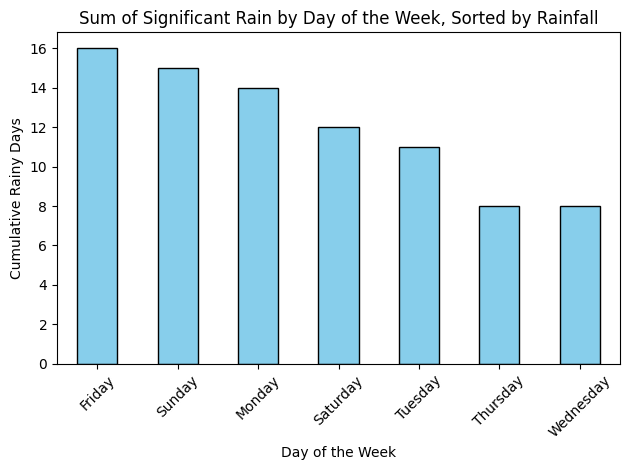

In [52]:
import matplotlib.pyplot as plt

# Sort the series by its values in descending order
sum_rained_per_day_sorted = sum_rained_per_day2.sort_values(ascending=False)

# Now plot the sorted series
sum_rained_per_day_sorted.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Sum of Significant Rain by Day of the Week, Sorted by Rainfall')
plt.xlabel('Day of the Week')
plt.ylabel('Cumulative Rainy Days')
plt.xticks(rotation=45)  # Rotate day names for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()


In [2]:
#Repeat for Seattle
import pandas as pd
import camelot

# List of PDF filenames
pdf_files2 = ['Sea-Jan23.pdf', 'Sea-Feb23.pdf', 'Sea-Mar23.pdf', 'Sea-Apr23.pdf', 'Sea-May23.pdf',
             'Sea-Jun23.pdf', 'Sea-Jul23.pdf', 'Sea-Aug23.pdf', 'Sea-Sep23.pdf', 'Sea-Oct23.pdf',
             'Sea-Nov23.pdf', 'Sea-Dec23.pdf']

# Initialize an empty DataFrame to append all tables
master_df2 = pd.DataFrame()
master_df2

""


In [6]:
for pdf_file2 in pdf_files2:
    # Read tables from each PDF
    tables = camelot.read_pdf(pdf_file2, flavor='stream', pages='1-end')
    
    for table in tables:
        # Convert each table to a DataFrame
        df2 = table.df
        
        # Check and drop unwanted columns if they exist
        columns_to_drop = [col for col in [1, 2, 3, 4, 5, 6] if col in df2.columns]
        if columns_to_drop:
            df2 = df2.drop(columns=columns_to_drop)
        
        # Drop unwanted rows. Using errors='ignore' to avoid KeyError if rows don't exist
        df2 = df2.drop([0, 1, 3, 35, 36, 37], errors='ignore')
        
        # Append the processed DataFrame to the master DataFrame
        master_df2 = pd.concat([master_df2, df2], ignore_index=True)

# Write the master DataFrame to a CSV file
master_df2.to_csv("Sea-Jan-Dec.csv", index=False)

In [7]:
import pandas as pd

# Load the data
data2 = pd.read_excel("Sea-Jan-Dec.xlsx")

# Assuming 'Day' is the column with the day of the week and 'Rained' contains 0s and 1s indicating rain status
# Sum up all the 1 values in the 'Rained' column for each day of the week
sum_rained_per_day_sea = data2.groupby('Day')['Significant Rain'].sum()

print(sum_rained_per_day_sea)


Day
Friday       15
Monday       18
Saturday     11
Sunday       18
Thursday     10
Tuesday      13
Wednesday     9
Name: Significant Rain, dtype: int64


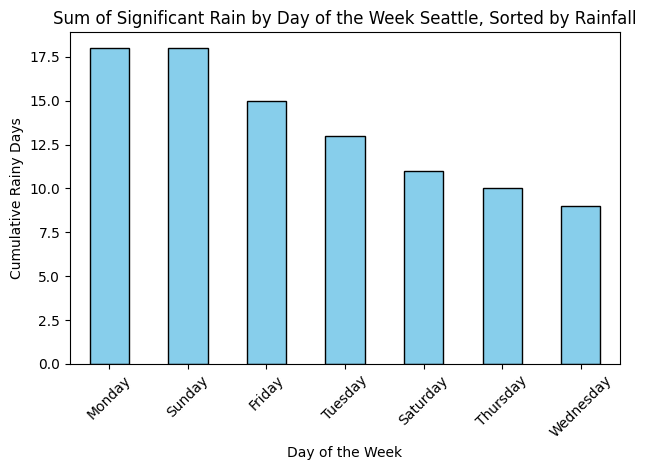

In [8]:
import matplotlib.pyplot as plt

# Sort the series by its values in descending order
sum_rained_per_day_sorted_sea = sum_rained_per_day_sea.sort_values(ascending=False)

# Now plot the sorted series
sum_rained_per_day_sorted_sea.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Sum of Significant Rain by Day of the Week Seattle, Sorted by Rainfall')
plt.xlabel('Day of the Week')
plt.ylabel('Cumulative Rainy Days')
plt.xticks(rotation=45)  # Rotate day names for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()


In [9]:
#Repeat for New Orleans
import pandas as pd
import camelot

# List of PDF filenames
pdf_files3 = ['Nola-Jan23.pdf', 'Nola-Feb23.pdf', 'Nola-Mar23.pdf', 'Nola-Apr23.pdf', 'Nola-May23.pdf',
             'Nola-Jun23.pdf', 'Nola-Jul23.pdf', 'Nola-Aug23.pdf', 'Nola-Sep23.pdf', 'Nola-Oct23.pdf',
             'Nola-Nov23.pdf', 'Nola-Dec23.pdf']

# Initialize an empty DataFrame to append all tables
master_df3 = pd.DataFrame()
master_df3

""


In [10]:
for pdf_file3 in pdf_files3:
    # Read tables from each PDF
    tables = camelot.read_pdf(pdf_file3, flavor='stream', pages='1-end')
    
    for table in tables:
        # Convert each table to a DataFrame
        df3 = table.df
        
        # Check and drop unwanted columns if they exist
        columns_to_drop = [col for col in [1, 2, 3, 4, 5, 6] if col in df3.columns]
        if columns_to_drop:
            df3 = df3.drop(columns=columns_to_drop)
        
        # Drop unwanted rows. Using errors='ignore' to avoid KeyError if rows don't exist
        df3 = df3.drop([0, 1, 3, 35, 36, 37], errors='ignore')
        
        # Append the processed DataFrame to the master DataFrame
        master_df3 = pd.concat([master_df3, df3], ignore_index=True)

# Write the master DataFrame to a CSV file
master_df3.to_csv("Nola-Jan-Dec.csv", index=False)

In [12]:
import pandas as pd

# Load the data
data3 = pd.read_excel("Nola-Jan-Dec.xlsx")

# Assuming 'Day' is the column with the day of the week and 'Rained' contains 0s and 1s indicating rain status
# Sum up all the 1 values in the 'Rained' column for each day of the week
sum_rained_per_day_nola = data3.groupby('Day')['Significant Rain'].sum()

print(sum_rained_per_day_nola)

Day
Friday        5
Monday        5
Saturday     12
Sunday        8
Thursday      8
Tuesday       8
Wednesday     4
Name: Significant Rain, dtype: int64


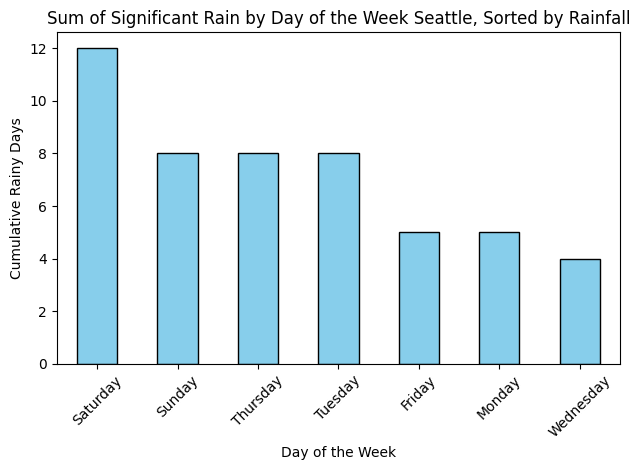

In [13]:
import matplotlib.pyplot as plt

# Sort the series by its values in descending order
sum_rained_per_day_sorted_nola = sum_rained_per_day_nola.sort_values(ascending=False)

# Now plot the sorted series
sum_rained_per_day_sorted_nola.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Sum of Significant Rain by Day of the Week New Orleans, Sorted by Rainfall')
plt.xlabel('Day of the Week')
plt.ylabel('Cumulative Rainy Days')
plt.xticks(rotation=45)  # Rotate day names for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()


In [21]:
#Repeat for Fort Lauderdale
import pandas as pd
import camelot

# List of PDF filenames
pdf_files5 = ['FL-Jan23.pdf', 'FL-Feb23.pdf', 'FL-Mar23.pdf', 'FL-Apr23.pdf', 'FL-May23.pdf',
             'FL-Jun23.pdf', 'FL-Jul23.pdf', 'FL-Aug23.pdf', 'FL-Sep23.pdf', 'FL-Oct23.pdf',
             'FL-Nov23.pdf', 'FL-Dec23.pdf']

# Initialize an empty DataFrame to append all tables
master_df5 = pd.DataFrame()
master_df5

""


In [22]:
for pdf_file5 in pdf_files5:
    # Read tables from each PDF
    tables = camelot.read_pdf(pdf_file5, flavor='stream', pages='1-end')
    
    for table in tables:
        # Convert each table to a DataFrame
        df5 = table.df
        
        # Check and drop unwanted columns if they exist
        columns_to_drop = [col for col in [1, 2, 3, 4, 5, 6] if col in df5.columns]
        if columns_to_drop:
            df5 = df5.drop(columns=columns_to_drop)
        
        # Drop unwanted rows. Using errors='ignore' to avoid KeyError if rows don't exist
        df5 = df5.drop([0, 1, 3, 35, 36, 37], errors='ignore')
        
        # Append the processed DataFrame to the master DataFrame
        master_df5 = pd.concat([master_df5, df5], ignore_index=True)

# Write the master DataFrame to a CSV file
master_df5.to_csv("FL-Jan-Dec5.csv", index=False)

In [24]:
import pandas as pd

# Load the data
data4 = pd.read_excel("FL-Jan-Dec.xlsx")

# Assuming 'Day' is the column with the day of the week and 'Rained' contains 0s and 1s indicating rain status
# Sum up all the 1 values in the 'Rained' column for each day of the week
sum_rained_per_day_FL = data4.groupby('Day')['Significant Rain'].sum()

print(sum_rained_per_day_FL)

Day
Friday       13
Monday       12
Saturday     15
Sunday       16
Thursday     13
Tuesday      14
Wednesday    12
Name: Significant Rain, dtype: int64


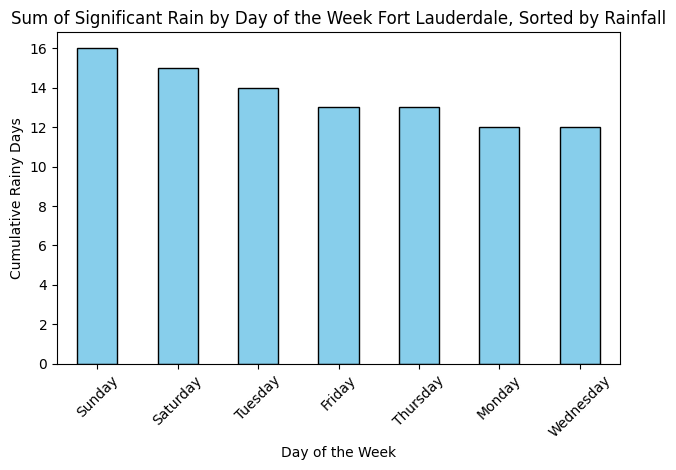

In [25]:
import matplotlib.pyplot as plt

# Sort the series by its values in descending order
sum_rained_per_day_sorted_FL = sum_rained_per_day_FL.sort_values(ascending=False)

# Now plot the sorted series
sum_rained_per_day_sorted_FL.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Sum of Significant Rain by Day of the Week Fort Lauderdale, Sorted by Rainfall')
plt.xlabel('Day of the Week')
plt.ylabel('Cumulative Rainy Days')
plt.xticks(rotation=45)  # Rotate day names for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()
